In [1]:
import pandas as pd

df = pd.read_csv('organic.csv')
df

,Compound,log(Kow),EHOMO,Q-,ELUMO,Q+,Class
0,methanol,-0.77,-11.135,-0.5353,3.7775,0.3182,1
1,ethanol,-0.31,-11.050,-0.5360,3.6513,0.3107,1
2,1-propanol,0.25,-10.940,-0.5317,3.6324,0.3122,1
3,2-propanol,0.05,-10.895,-0.5469,3.4925,0.3166,1
4,1-butanol,0.88,-10.940,-0.5422,3.5041,0.3141,1
...,...,...,...,...,...,...,...
185,2-nitroaniline,1.85,-9.068,-0.6488,-0.7937,0.3510,2
186,3-nitroaniline,1.37,-9.254,-0.9468,-0.9503,0.3922,2
187,4-nitroaniline,1.39,-9.160,-0.6493,0.7050,0.3134,2
188,2-chloro-4-nitroaniline,2.06,-9.256,-0.6434,-0.9066,0.3183,2


In [2]:
df['Gap'] = df['ELUMO'] - df['EHOMO']
df

,Compound,log(Kow),EHOMO,Q-,ELUMO,Q+,Class,Gap
0,methanol,-0.77,-11.135,-0.5353,3.7775,0.3182,1,14.9125
1,ethanol,-0.31,-11.050,-0.5360,3.6513,0.3107,1,14.7013
2,1-propanol,0.25,-10.940,-0.5317,3.6324,0.3122,1,14.5724
3,2-propanol,0.05,-10.895,-0.5469,3.4925,0.3166,1,14.3875
4,1-butanol,0.88,-10.940,-0.5422,3.5041,0.3141,1,14.4441
...,...,...,...,...,...,...,...,...
185,2-nitroaniline,1.85,-9.068,-0.6488,-0.7937,0.3510,2,8.2743
186,3-nitroaniline,1.37,-9.254,-0.9468,-0.9503,0.3922,2,8.3037
187,4-nitroaniline,1.39,-9.160,-0.6493,0.7050,0.3134,2,9.8650
188,2-chloro-4-nitroaniline,2.06,-9.256,-0.6434,-0.9066,0.3183,2,8.3494


In [3]:
X = df[['Q-', 'Gap']].values
y = df['Class'].values

In [4]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier()
clf_tree.fit(X, y)

DecisionTreeClassifier()

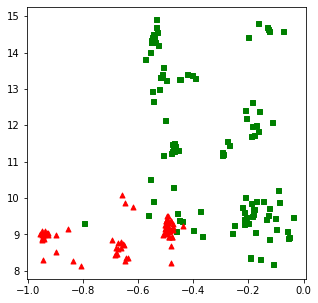

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 5))
x1 = df.iloc[:114, 3]
y1 = df.iloc[:114, 7]
x2 = df.iloc[114:, 3]
y2 = df.iloc[114:, 7]
plt.scatter(x1, y1, c = 'g', marker = 's', s = 25)
plt.scatter(x2, y2, c = 'r', marker = '^', s = 25)
plt.show()

In [6]:
import numpy as np

xx, yy = np.meshgrid(np.arange(-1.0, 0.1, 0.01), np.arange(8, 15.2, 0.01))
coords = np.stack((xx.reshape(-1), yy.reshape(-1)), axis = 1)

In [7]:
coords

array([[-1.  ,  8.  ],
       [-0.99,  8.  ],
       [-0.98,  8.  ],
       ...,
       [ 0.07, 15.19],
       [ 0.08, 15.19],
       [ 0.09, 15.19]])

# 9:25继续

In [14]:
Z = clf_tree.predict(coords)
Z

array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

In [16]:
Z = Z.reshape(xx.shape)
Z.shape

(720, 110)

In [20]:
from matplotlib.colors import ListedColormap

def plot_res(xx, yy, Z):
    light_rgb = ListedColormap(['#AAFFAA', '#FFAAAA'])
    plt.figure(figsize = (5, 5))
    plt.pcolormesh(xx, yy, Z, shading='auto', cmap = light_rgb)
    plt.scatter(x1, y1, c = 'g', marker = 's', s = 25)
    plt.scatter(x2, y2, c = 'r', marker = '^', s = 25)
    plt.show()

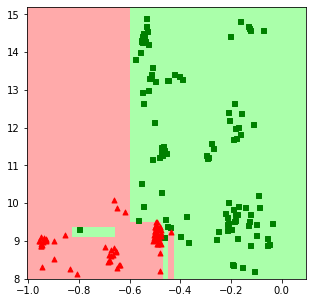

In [21]:
plot_res(xx, yy, Z)

In [22]:
clf_tree2 = DecisionTreeClassifier(criterion = 'entropy')
clf_tree2.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

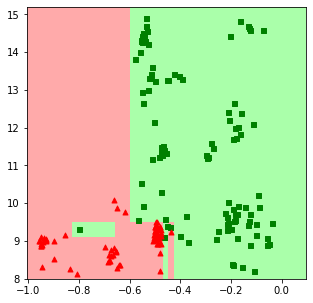

In [23]:
Z = clf_tree2.predict(coords)
Z = Z.reshape(xx.shape)
plot_res(xx, yy, Z)

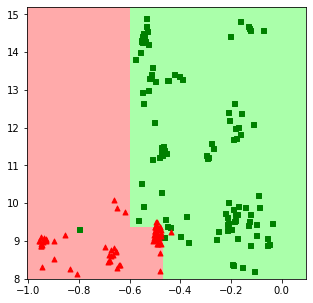

In [25]:
clf_tree3 = DecisionTreeClassifier(max_depth = 2)
clf_tree3.fit(X, y)

Z = clf_tree3.predict(coords)
Z = Z.reshape(xx.shape)
plot_res(xx, yy, Z)

In [26]:
from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB()
clf_nb.fit(X, y)

GaussianNB()

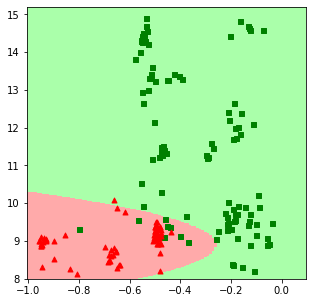

In [27]:
Z = clf_nb.predict(coords)
Z = Z.reshape(xx.shape)
plot_res(xx, yy, Z)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
y_true = [0, 1, 2, 3]
y_pred = [0, 1, 2, 2]

print(accuracy_score(y_true, y_pred))

0.75


In [30]:
print(accuracy_score(y, clf_tree.predict(X)))

1.0


In [31]:
print(accuracy_score(y, clf_tree2.predict(X)))

1.0


In [32]:
print(accuracy_score(y, clf_tree3.predict(X)))

0.968421052631579


In [33]:
print(accuracy_score(y, clf_nb.predict(X)))

0.9473684210526315


## 留出法

In [34]:
len(X)

190

In [35]:
from sklearn.utils import shuffle
X_r, y_r = shuffle(X, y)
X_train, y_train = X_r[:-40, :], y_r[:-40]
X_test, y_test = X_r[-40:, :], y_r[-40:]

CART树

In [36]:
clf_tree.fit(X_train, y_train)
accuracy_score(y_test, clf_tree.predict(X_test))

0.975

ID3

In [37]:
clf_tree2.fit(X_train, y_train)
accuracy_score(y_test, clf_tree2.predict(X_test))

0.975

2层

In [38]:
clf_tree3.fit(X_train, y_train)
accuracy_score(y_test, clf_tree3.predict(X_test))

0.975

贝叶斯

In [39]:
clf_nb.fit(X_train, y_train)
accuracy_score(y_test, clf_nb.predict(X_test))

0.95

# 11:12继续

交叉验证

CART

In [51]:
from sklearn.model_selection import cross_val_score

acc = cross_val_score(clf_tree, X, y, cv = 10)
print('Folds: %i, mean accuracy: %.3f' % (len(acc), np.mean(acc)))

Folds: 10, mean accuracy: 0.953


ID3 

In [52]:
acc = cross_val_score(clf_tree2, X, y, cv = 10)
print('Folds: %i, mean accuracy: %.3f' % (len(acc), np.mean(acc)))

Folds: 10, mean accuracy: 0.953


2层

In [55]:
acc = cross_val_score(clf_tree3, X, y, cv = 10)
print('Folds: %i, mean accuracy: %.3f' % (len(acc), np.mean(acc)))

Folds: 10, mean accuracy: 0.958


bayes

In [56]:
acc = cross_val_score(clf_nb, X, y, cv = 10)
print('Folds: %i, mean accuracy: %.3f' % (len(acc), np.mean(acc)))

Folds: 10, mean accuracy: 0.942


In [57]:
acc

array([1.        , 1.        , 0.94736842, 0.78947368, 0.89473684,
       0.89473684, 1.        , 0.89473684, 1.        , 1.        ])